# Unsupervised Learning Algorithms - Dendrograms and PCA

### This script contains the following:
#### 1. Import Libraries and Data
#### 2. Remove Unnecessary Data and Scale Data
#### 3. Create Dendrograms 
#### 4. Dimensionality Reduction (PCA)
#### 5. Dendrogram Retrial with Reduced Data
#### 6. Dimensionality Reduction (15 Components)
#### 7. Dendrogram Retrial with Reduced Data

### 1. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Create a path for faster data importation
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Basics of Machine Learning for Analysts\10-2024 ClimateWins'
# Using previously prepared data set joining pleasant weather data and climate data together, it is taken from the decade of 2012-2022
df= pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'Previous_Decade_Weather_Data.csv'))
# confirm import
df.head()

DATE  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  2012-01-01                  8               1.9            0.79   
1  2012-01-02                  8               3.1            0.87   
2  2012-01-03                  5               3.1            0.72   
3  2012-01-04                  5               5.1            0.70   
4  2012-01-05                  7               7.8            0.73   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0          1.0187                    0.32                 0.00   
1          1.0168                    0.18                 0.75   
2          1.0240                    0.53                 0.70   
3          1.0229                    0.45                 0.09   
4          1.0082                    0.26                 1.12   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  ...  \
0                 0             0.0             11.4  ...   
1                 0             0.0              7.3  ...   
2                 0             3.4              7.2  ...   
3                 0             2.9              6.9  ...   
4                 0             0.3              6.8  ...   

   HEATHROW_pleasant_weather  KASSEL_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   MADRID_pleasant_weather  MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                        0                          0                      0   
1                        0                          0                      0   
2                        0                          0                      0   
3                        0                          0                      0   
4                        0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 184 columns]

### 2. Remove Unnecessary Data and Scale Data

In [3]:
# Drop the DATE and unecessary data as those numbers are not scaled with the rest.
pleasant_weather_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]
columns_to_drop = ['DATE',
                         # GDANSK data
                         'GDANSK_cloud_cover', 'GDANSK_humidity',
                         'GDANSK_precipitation', 'GDANSK_snow_depth',
                         'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                         # ROMA data
                         'ROMA_cloud_cover', 'ROMA_humidity', 'ROMA_pressure',
                         'ROMA_sunshine', 'ROMA_temp_mean',
                         # TOURS data
                         'TOURS_humidity', 'TOURS_pressure',
                         'TOURS_global_radiation', 'TOURS_precipitation',
                         'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max']
columns_to_drop.extend(pleasant_weather_cols)
# Drop the columns
df_dropped = df.drop(columns_to_drop, axis=1)
# Create scaler object
scaler = StandardScaler()
# Fit and trasform data
df_scaled_data = scaler.fit_transform(df_dropped)
# Convert scaled data back to a dataframe (adding column names back in)
df_scaled= pd.DataFrame(df_scaled_data, columns = df_dropped.columns)
df_scaled = pd.concat([df_scaled, df[pleasant_weather_cols]], axis =1)
df_scaled

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0              1.158381         -0.016168        0.458557        0.108007   
1              1.158381          1.342591        1.123729       -0.130397   
2             -0.144304          1.342591       -0.123470        0.773028   
3             -0.144304          3.607188       -0.289763        0.635005   
4              0.724153          6.664393       -0.040323       -1.209489   
...                 ...               ...             ...             ...   
3952          -1.881217          0.210292        0.458557        0.873409   
3953           0.289925          0.210292        0.292263        0.823219   
3954          -0.578532          0.210292        0.209117        0.609910   
3955          -0.144304          0.210292        0.541703        0.421696   
3956          -0.144304          0.210292        0.874289        0.183292   

      BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                  -1.252213            -0.455735         -0.148578   
1                  -1.402660             1.044202         -0.148578   
2                  -1.026541             0.944206         -0.148578   
3                  -1.112511            -0.275743         -0.148578   
4                  -1.316690             1.784170         -0.148578   
...                      ...                  ...               ...   
3952               -0.156094            -0.015754         -0.148578   
3953               -0.156094            -0.015754         -0.148578   
3954               -0.156094            -0.015754         -0.148578   
3955               -0.156094            -0.015754         -0.148578   
3956               -0.156094            -0.015754         -0.148578   

      BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
0          -1.118805        -0.026458        0.187029  ...   
1          -1.118805        -0.584357       -0.446252  ...   
2          -0.368735        -0.597964       -0.925075  ...   
3          -0.479039        -0.638786       -0.477144  ...   
4          -1.052622        -0.652393       -0.600711  ...   
...              ...              ...             ...  ...   
3952        0.579883         0.585870        0.650406  ...   
3953        0.072483         0.694728        1.098337  ...   
3954        0.226909         0.694728        0.912986  ...   
3955        0.160726         0.517834        0.681298  ...   
3956       -0.412857         0.259295        0.418718  ...   

      HEATHROW_pleasant_weather  KASSEL_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3952                          0                        0   
3953                          0                        0   
3954                          0                        0   
3955                          0                        0   
3956                          0                        0   

      LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
...                          ...                          ...   
3952                           0                            0   
3953                           0                            0   
3954                           0                            0   
3955                           0                            0   
3956                           0               

In [4]:
# For a scaled dataframe with the date added back in
df_scaled_date = pd.concat([df['DATE'], df_scaled], axis = 1)
df_scaled_date.head()

DATE  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  2012-01-01           1.158381         -0.016168        0.458557   
1  2012-01-02           1.158381          1.342591        1.123729   
2  2012-01-03          -0.144304          1.342591       -0.123470   
3  2012-01-04          -0.144304          3.607188       -0.289763   
4  2012-01-05           0.724153          6.664393       -0.040323   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0        0.108007               -1.252213            -0.455735   
1       -0.130397               -1.402660             1.044202   
2        0.773028               -1.026541             0.944206   
3        0.635005               -1.112511            -0.275743   
4       -1.209489               -1.316690             1.784170   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  ...  \
0         -0.148578       -1.118805        -0.026458  ...   
1         -0.148578       -1.118805        -0.584357  ...   
2         -0.148578       -0.368735        -0.597964  ...   
3         -0.148578       -0.479039        -0.638786  ...   
4         -0.148578       -1.052622        -0.652393  ...   

   HEATHROW_pleasant_weather  KASSEL_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   MADRID_pleasant_weather  MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                        0                          0                      0   
1                        0                          0                      0   
2                        0                          0                      0   
3                        0                          0                      0   
4                        0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 165 columns]

### 3. Create Dendrograms

##### Single

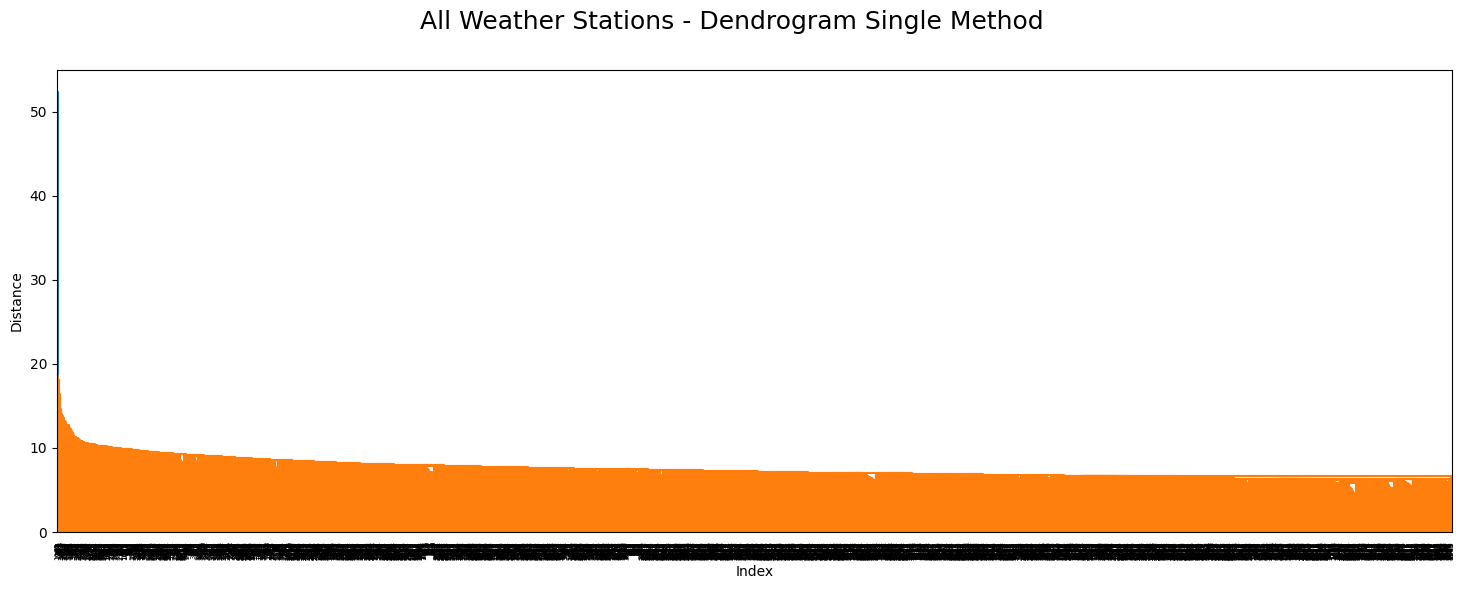

In [5]:
distance_single = linkage(df_scaled, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method",fontsize=18)
plt.show()

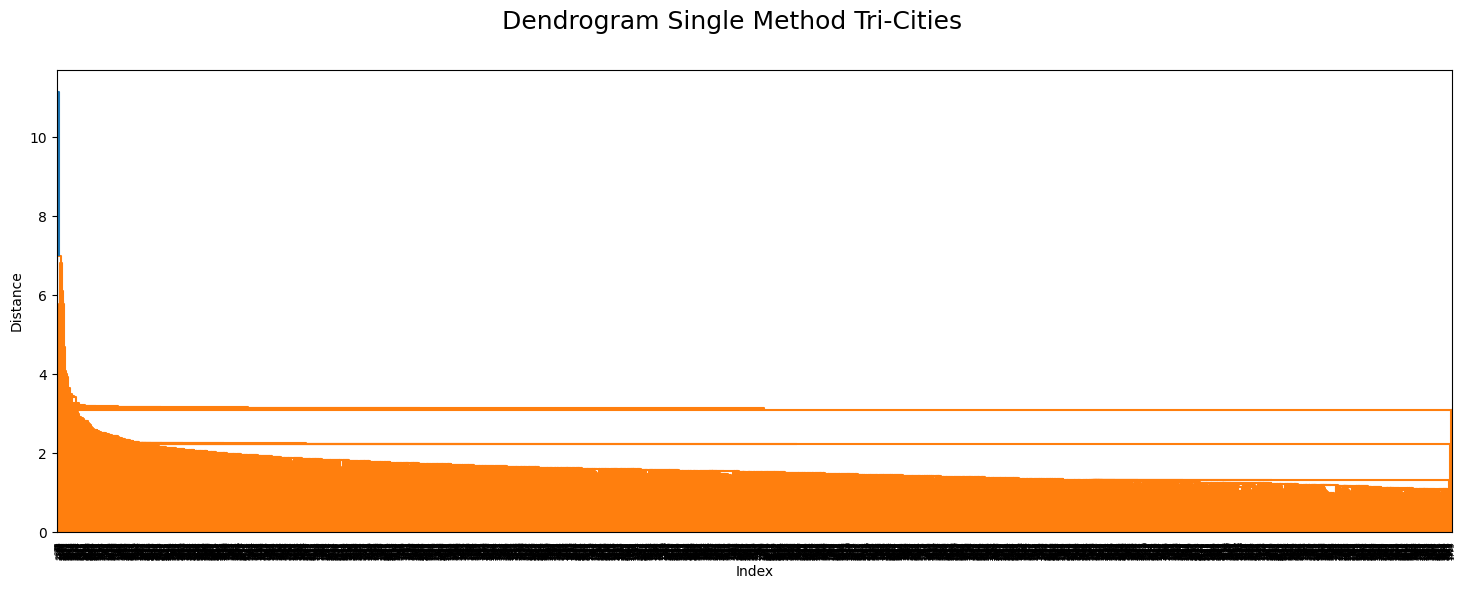

In [6]:
#Comparing only Heathrow, Madrid, Valentia 2012-2022 - single method

distance_single3 = linkage(df_scaled.loc[:,
[ 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
 ,]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single3, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method Tri-Cities",fontsize=18)
plt.show()

##### Complete

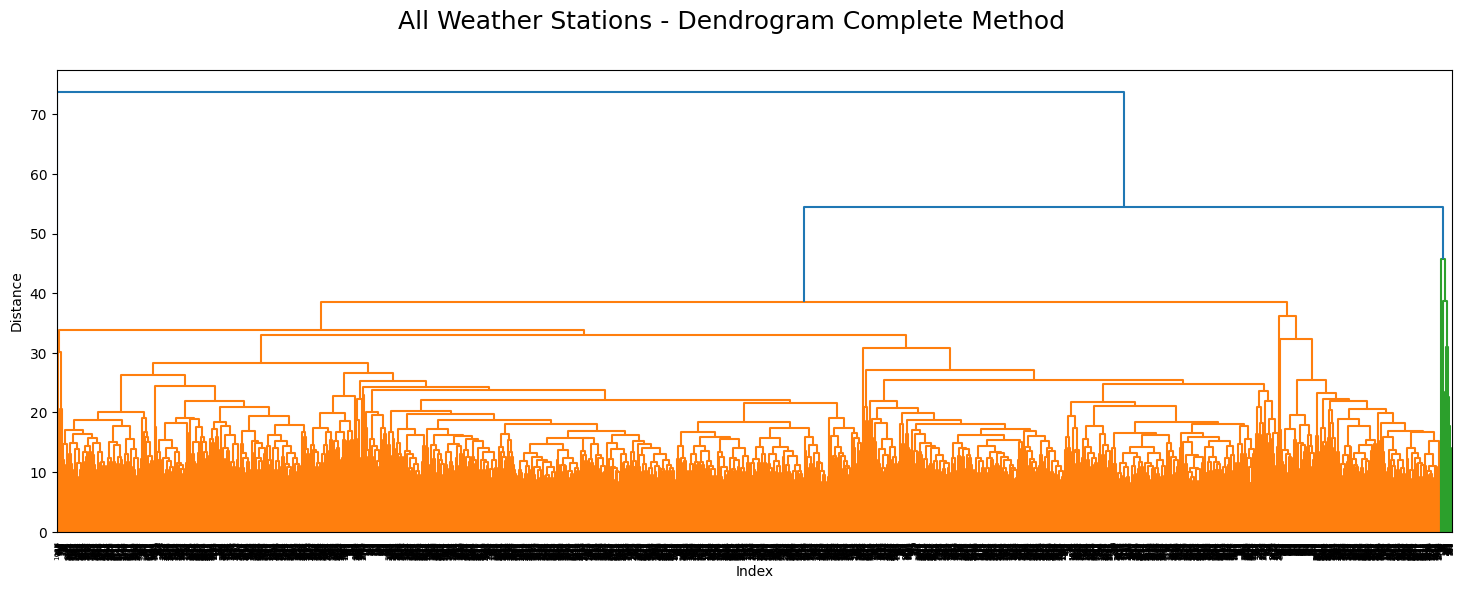

In [7]:
distance_complete = linkage(df_scaled, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Complete Method",fontsize=18)
plt.show()

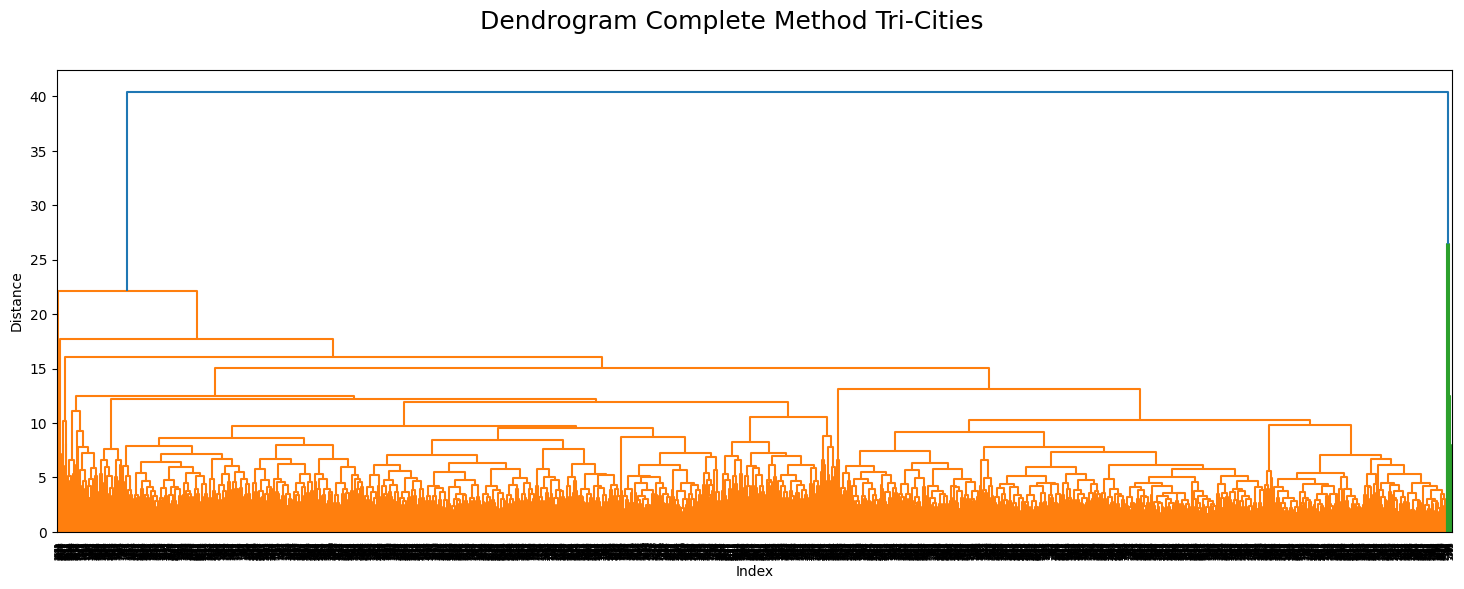

In [8]:
#Comparing only Heathrow, Madrid, Valentia 2012-2022 - complete method

distance_complete3 = linkage(df_scaled.loc[:,
[ 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
 ,]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete3, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method Tri-Cities",fontsize=18)
plt.show()

##### Average

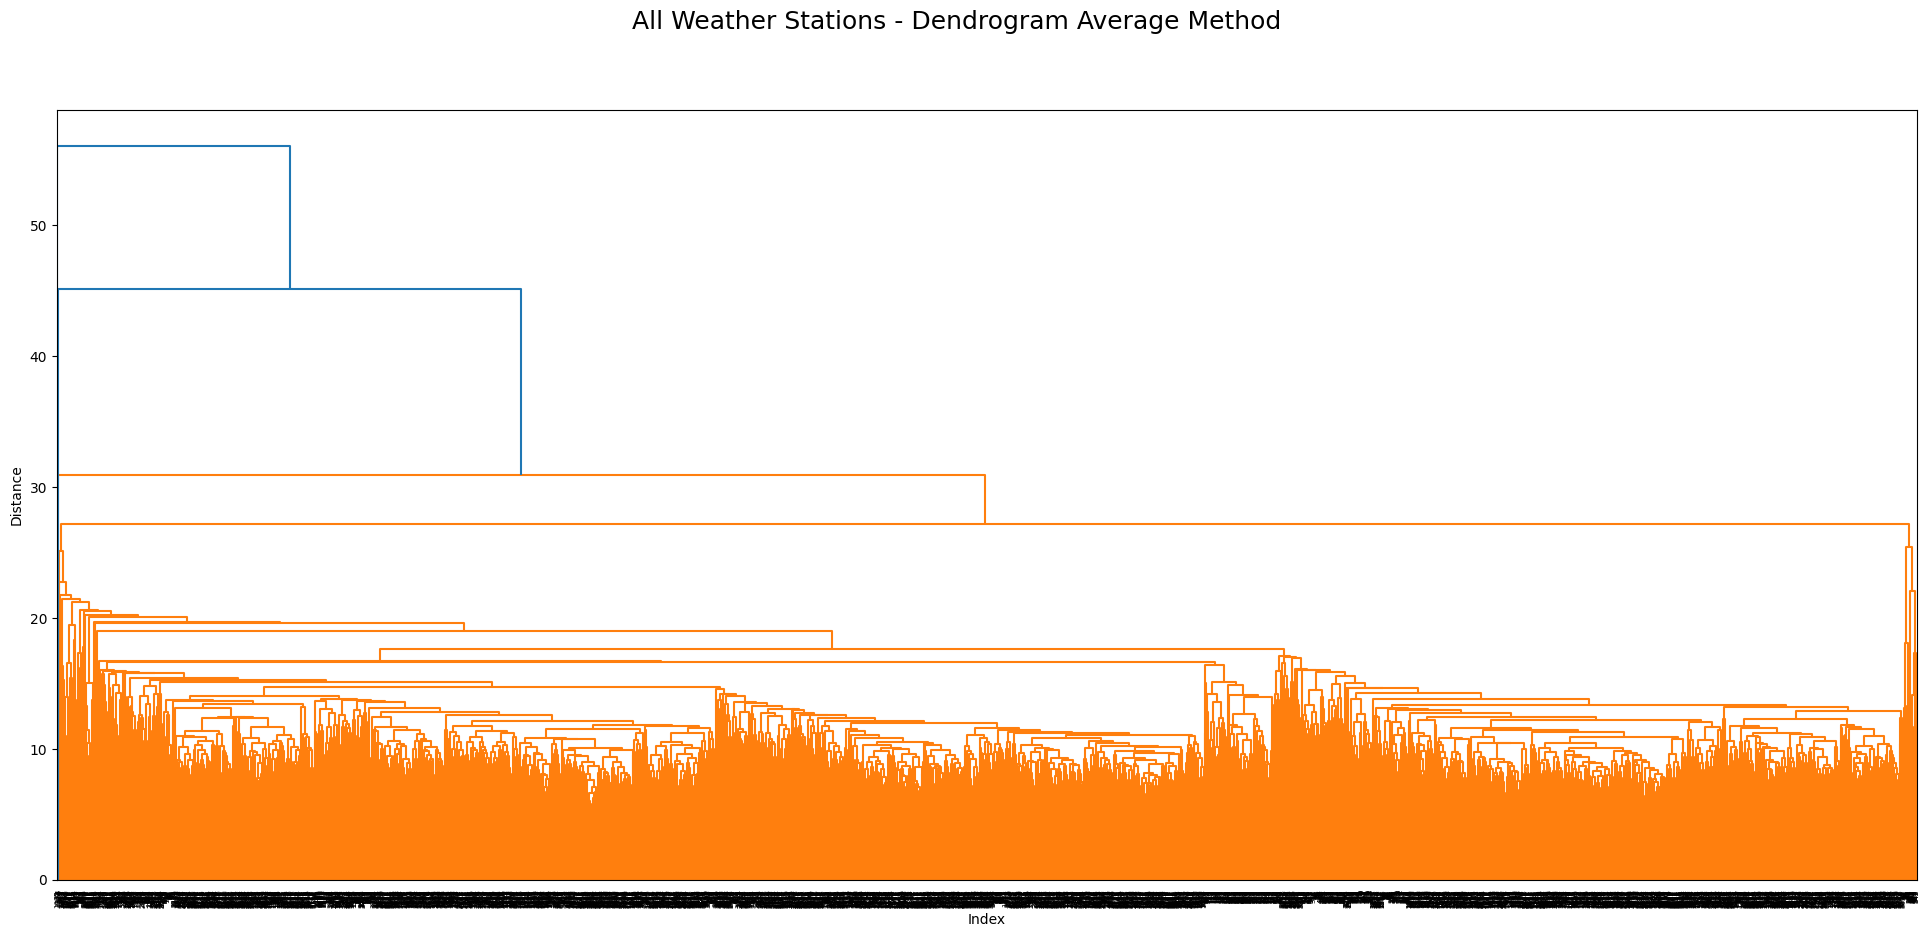

In [9]:
distance_average = linkage(df_scaled, method="average")
plt.figure(figsize=(24,10))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Average Method",fontsize=18)
plt.show()

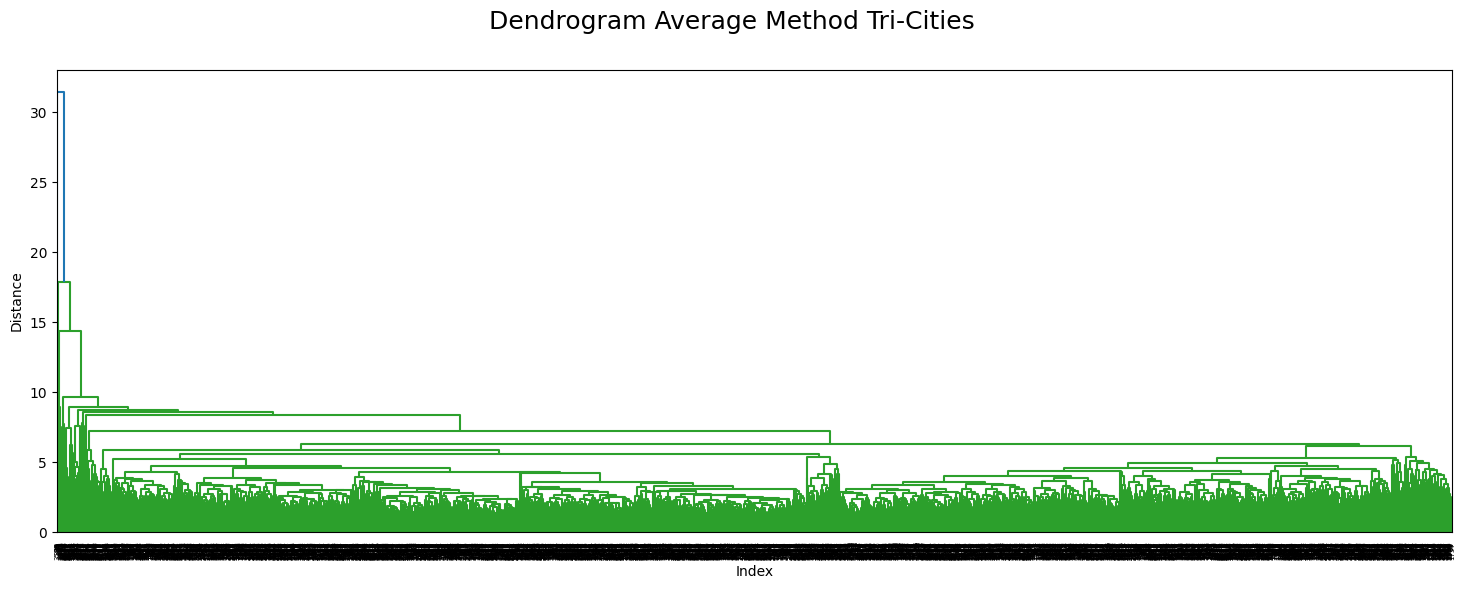

In [10]:
#Comparing only Heathrow, Madrid, Valentia 2012-2022 - average method

distance_average3 = linkage(df_scaled.loc[:,
[ 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
 ,]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average3, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method Tri-Cities",fontsize=18)
plt.show()

##### Ward

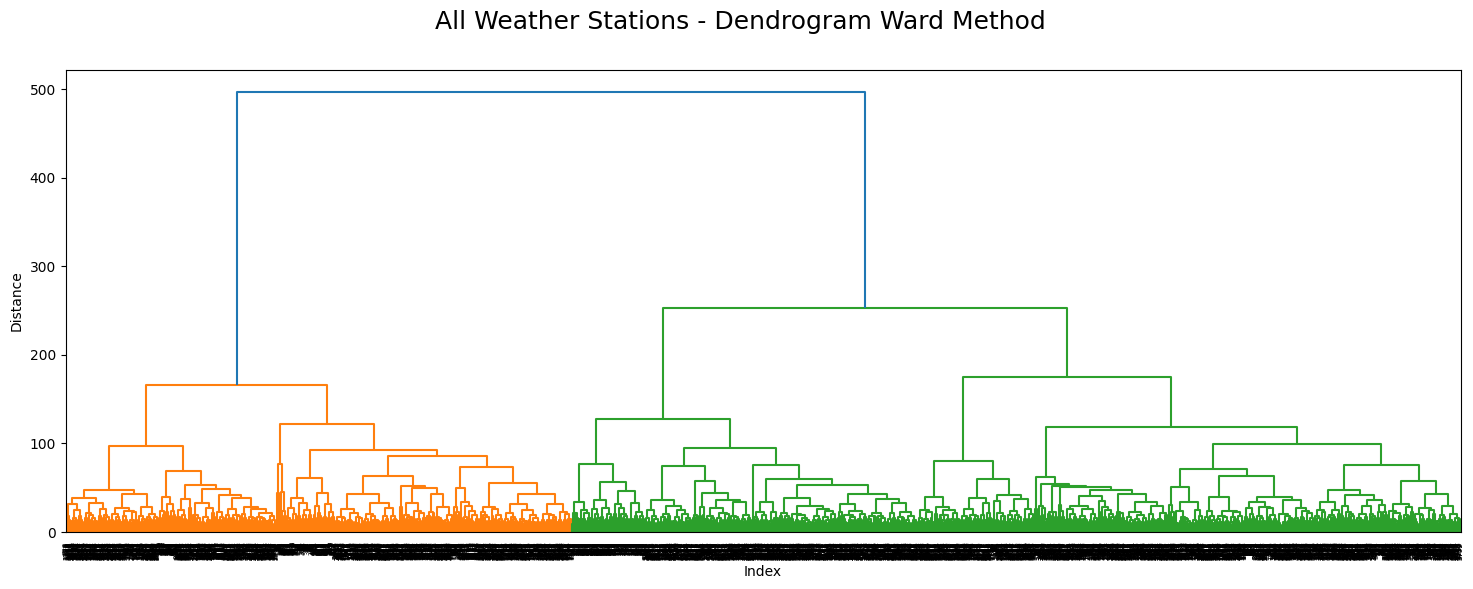

In [11]:
distance_ward = linkage(df_scaled, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Ward Method",fontsize=18)
plt.show()

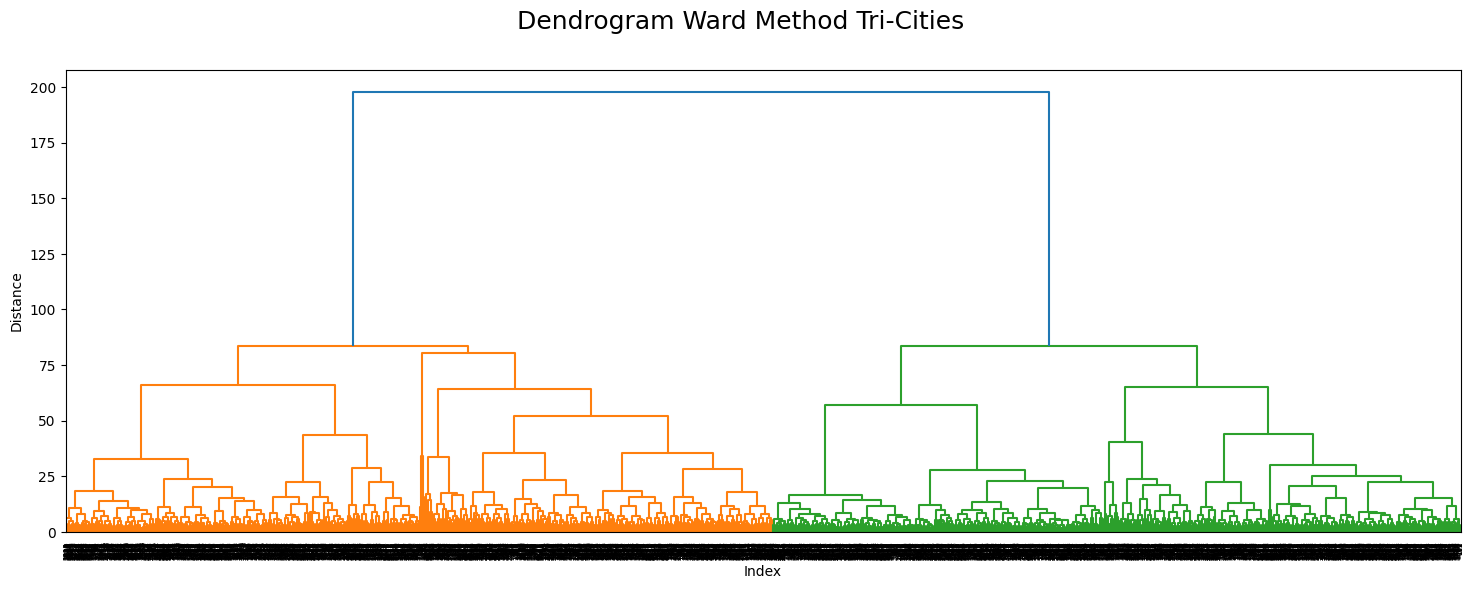

In [12]:
#Comparing only Heathrow, Madrid, Valentia 2012-2022 - ward method

distance_ward3 = linkage(df_scaled.loc[:,
[ 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
 ,]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward3, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method Tri-Cities",fontsize=18)
plt.show()

### 4. Dimensionality Reduction (PCA)

In [13]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

In [14]:
principalComponents

array([[-7.11703365, -4.47909754],
       [-7.18355644, -3.30675354],
       [-7.77326198, -3.14027656],
       ...,
       [ 2.52710501, -0.92580346],
       [ 1.48445257, -0.36705474],
       [-0.13769614, -1.65963831]])

In [15]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])
dfPCA.to_csv(os.path.join(path, '02 Data', 'Unsupervised', 'Dimension_Reduction_2n.csv'), index = False)
dfPCA


PCA1      PCA2
0    -7.117034 -4.479098
1    -7.183556 -3.306754
2    -7.773262 -3.140277
3    -7.866878 -3.141880
4    -9.176076 -7.736830
...        ...       ...
3952  2.139231 -0.359506
3953  2.390635 -1.034931
3954  2.527105 -0.925803
3955  1.484453 -0.367055
3956 -0.137696 -1.659638

[3957 rows x 2 columns]

### 5. Dendrogram Retrial with Reduced Data

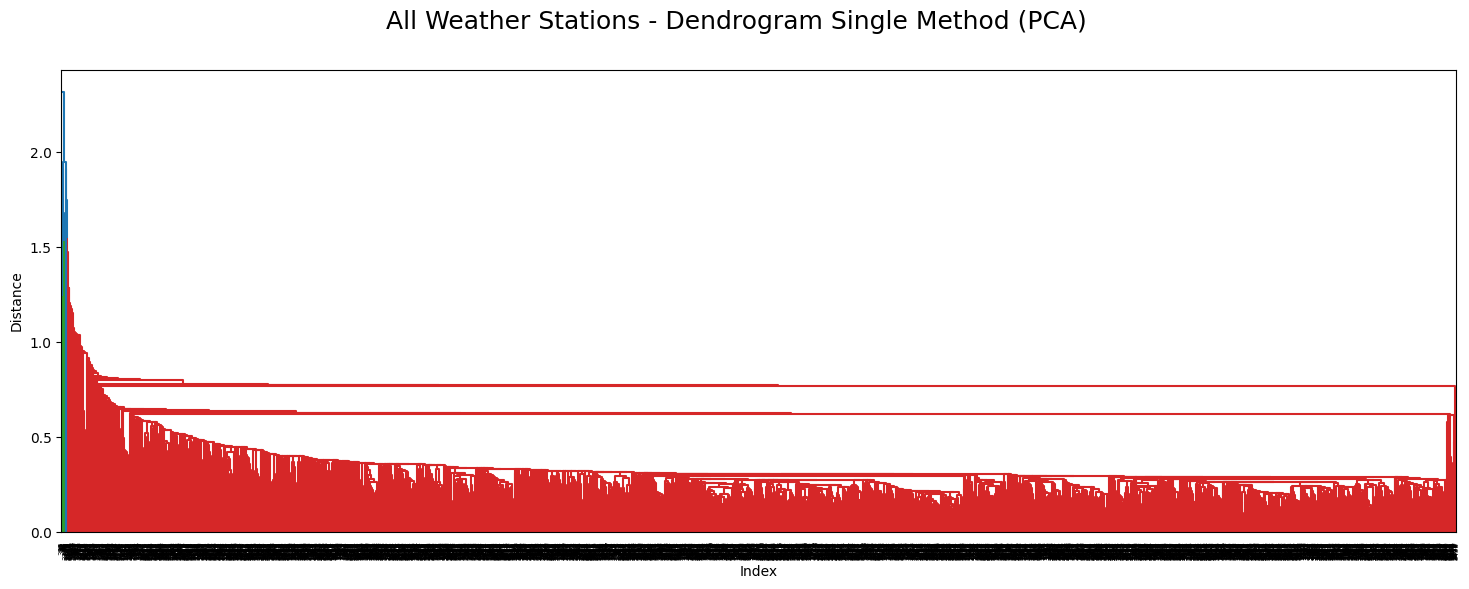

In [16]:
distance_single_pca = linkage(dfPCA, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method (PCA)",fontsize=18)
plt.show()

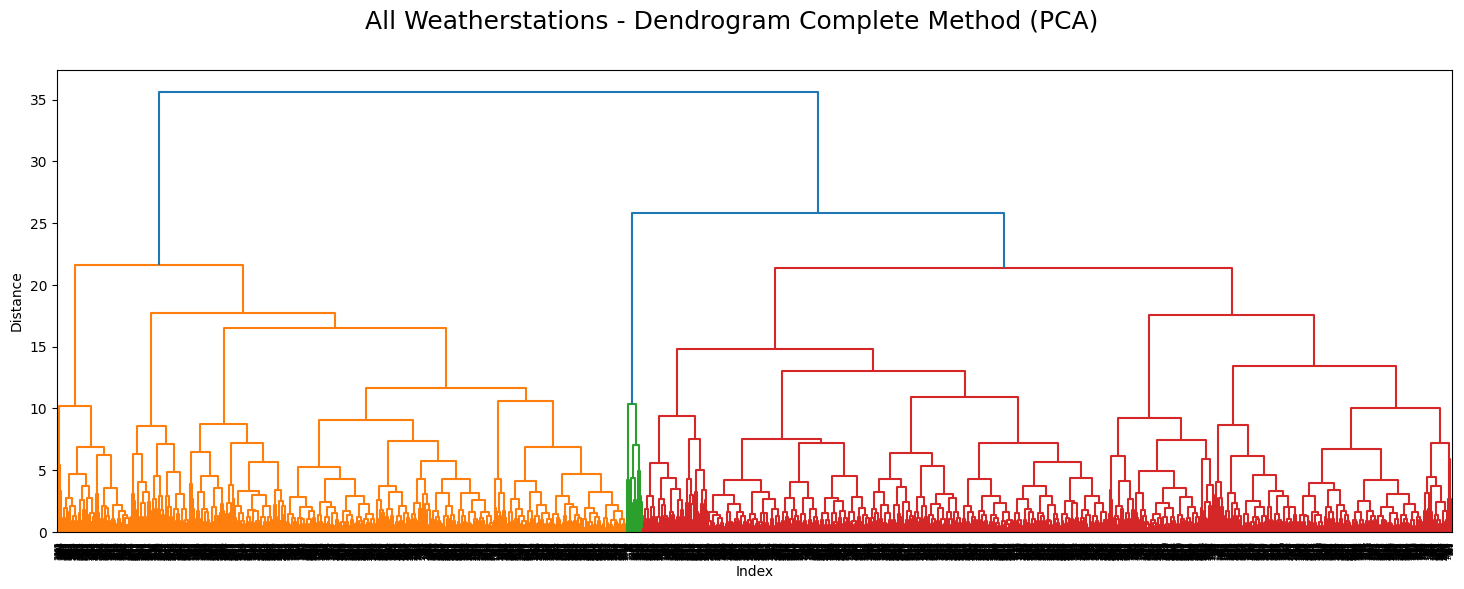

In [17]:
distance_complete_pca = linkage(dfPCA, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Complete Method (PCA)",fontsize=18)
plt.show()

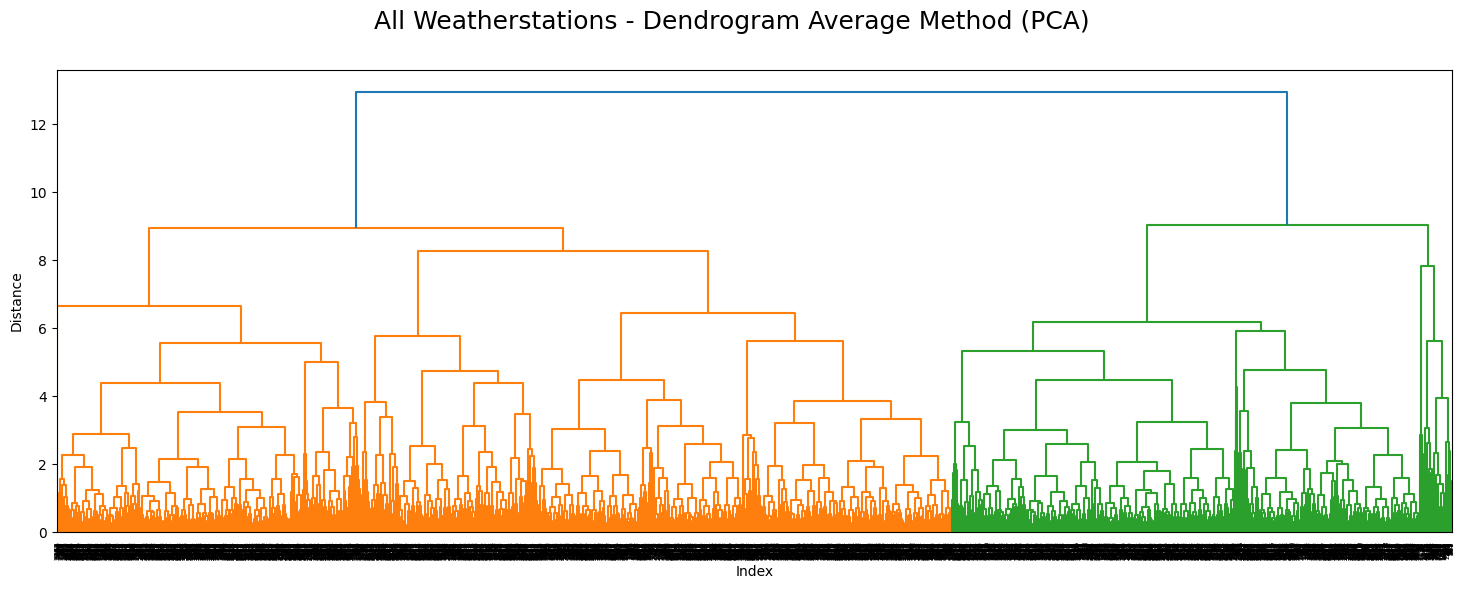

In [18]:
distance_average_pca = linkage(dfPCA, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Average Method (PCA)",fontsize=18)
plt.show()

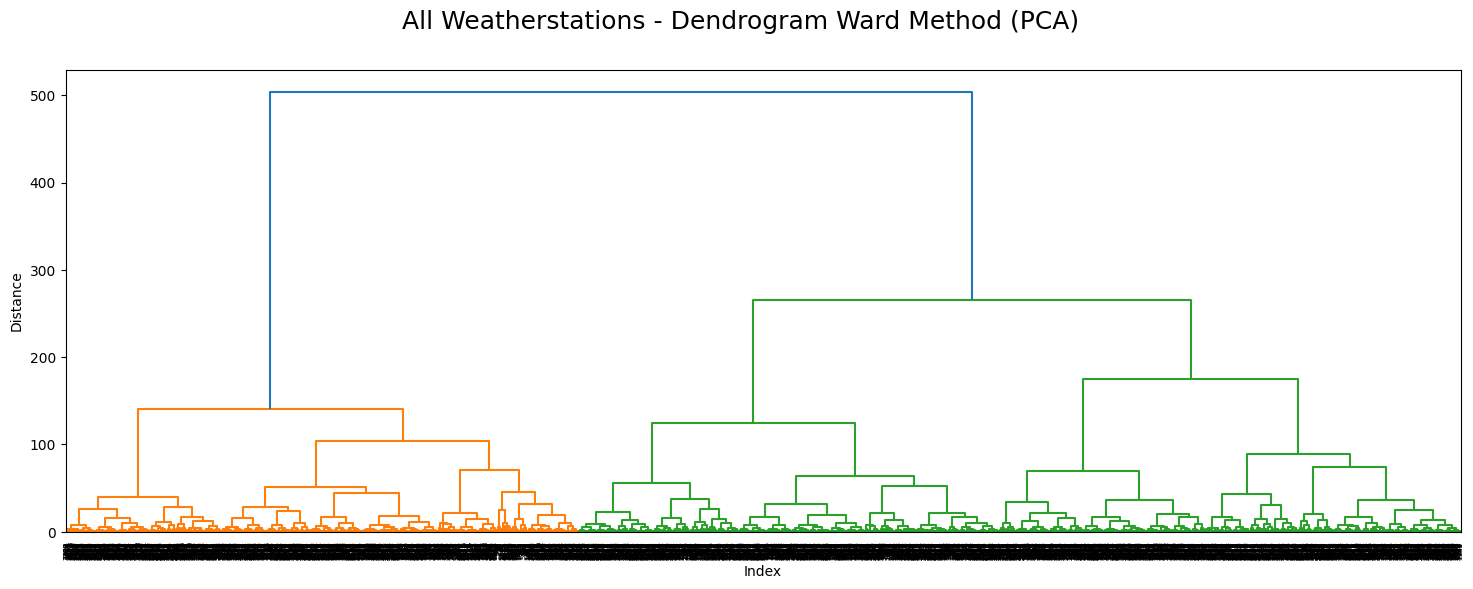

In [19]:
distance_ward_pca = linkage(dfPCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Ward Method (PCA)",fontsize=18)
plt.show()

### 6. Dimensionality Reduction (15 Components)¶

In [20]:
#Run the PCA model, reducing to 2 components
pca15 = PCA(n_components=15)
principalComponents = pca15.fit_transform(df_scaled)

In [21]:
principalComponents

array([[-7.11703365, -4.47909754,  3.72706691, ..., -1.34189279,
         0.26532451,  0.8580546 ],
       [-7.18355644, -3.30675354, -0.49733612, ..., -1.30639575,
         1.25542622,  0.06644234],
       [-7.77326198, -3.14027656,  2.39044566, ..., -0.76860536,
         1.34602236,  0.23795727],
       ...,
       [ 2.52710501, -0.92580346,  3.09758795, ...,  0.13426602,
         0.02350787, -0.2631609 ],
       [ 1.48445257, -0.36705474,  3.03184127, ..., -0.06720976,
        -0.07092955,  0.27157252],
       [-0.13769614, -1.65963831,  2.6065739 , ...,  1.34636988,
        -0.22636753,  0.18044309]])

In [22]:
#Make a dataframe of the new components
dfPCA15 = pd.DataFrame(principalComponents, columns=[f'PCA{i}' for i in range (1,16)])
dfPCA15.to_csv(os.path.join(path, '02 Data', 'Unsupervised', 'Dimension_Reduction_15n.csv'), index = False)
dfPCA15

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -7.117034 -4.479098  3.727067  0.346720 -5.586024 -0.035022  2.439078   
1    -7.183556 -3.306754 -0.497336  0.092239 -2.924928  1.007267  2.138744   
2    -7.773262 -3.140277  2.390446 -3.192943 -6.154468 -1.566137  5.212816   
3    -7.866878 -3.141880  0.241008 -1.273644 -5.058195 -2.550981  4.346234   
4    -9.176076 -7.736830 -2.907880 -4.270599 -6.623076 -3.759508  5.171806   
...        ...       ...       ...       ...       ...       ...       ...   
3952  2.139231 -0.359506  4.370700  0.788917 -1.314097  1.943722  1.125946   
3953  2.390635 -1.034931  3.779867  1.146214 -1.013302  2.035557  1.589061   
3954  2.527105 -0.925803  3.097588  1.477053 -1.306647  1.250979 -0.137978   
3955  1.484453 -0.367055  3.031841  1.390356 -0.819328  2.421956 -0.332430   
3956 -0.137696 -1.659638  2.606574  1.012001 -0.361470  2.575233 -0.904982   

          PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0    -1.388558 -1.975383  0.375373  1.612104  0.111624 -1.341893  0.265325   
1    -4.427942  0.314658 -1.911155  1.683712  0.861871 -1.306396  1.255426   
2    -1.607394 -2.276919  0.404150  1.288300  0.283427 -0.768605  1.346022   
3    -2.844297 -2.608714 -0.656449  0.255758 -0.402876 -1.612141  1.477155   
4    -4.338511 -4.974134 -3.317132  5.670839  3.701592 -3.469667  1.680920   
...        ...       ...       ...       ...       ...       ...       ...   
3952  0.443335 -0.526852  0.443900  0.347328 -0.035339  0.801991  0.963770   
3953 -0.434442 -0.311228  0.569852  0.148733 -0.122550  1.393510  0.084793   
3954  0.061604 -1.572126  0.330276 -0.843584 -0.340861  0.134266  0.023508   
3955 -0.201567 -0.678754  0.657278  0.057783 -0.175180 -0.067210 -0.070930   
3956 -0.220857 -0.591715 -0.054936  0.148024  0.307910  1.346370 -0.226368   

         PCA15  
0     0.858055  
1     0.066442  
2     0.237957  
3     0.350381  
4     4.117053  
...        ...  
3952  0.033079  
3953  0.154998  
3954 -0.263161  
3955  0.271573  
3956  0.180443  

[3957 rows x 15 columns]

### 7. Dendrogram Retrial with Reduced Data

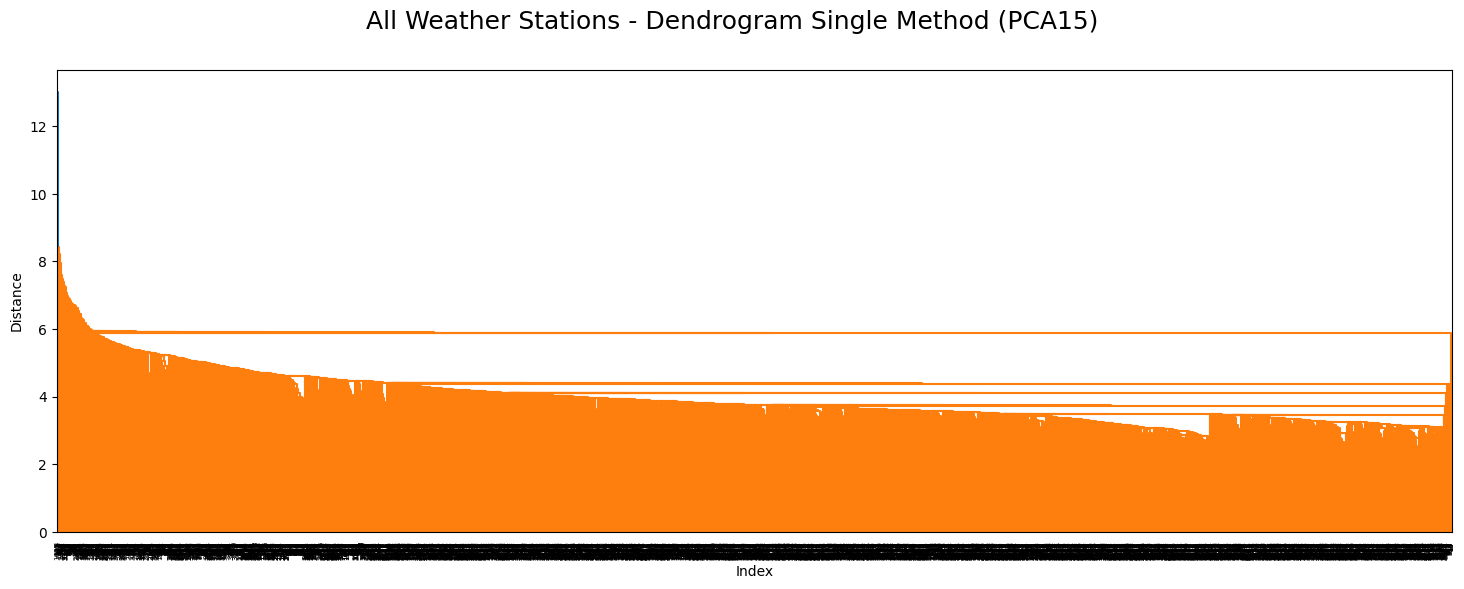

In [23]:
distance_single_pca15 = linkage(dfPCA15, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single_pca15, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method (PCA15)",fontsize=18)
plt.show()

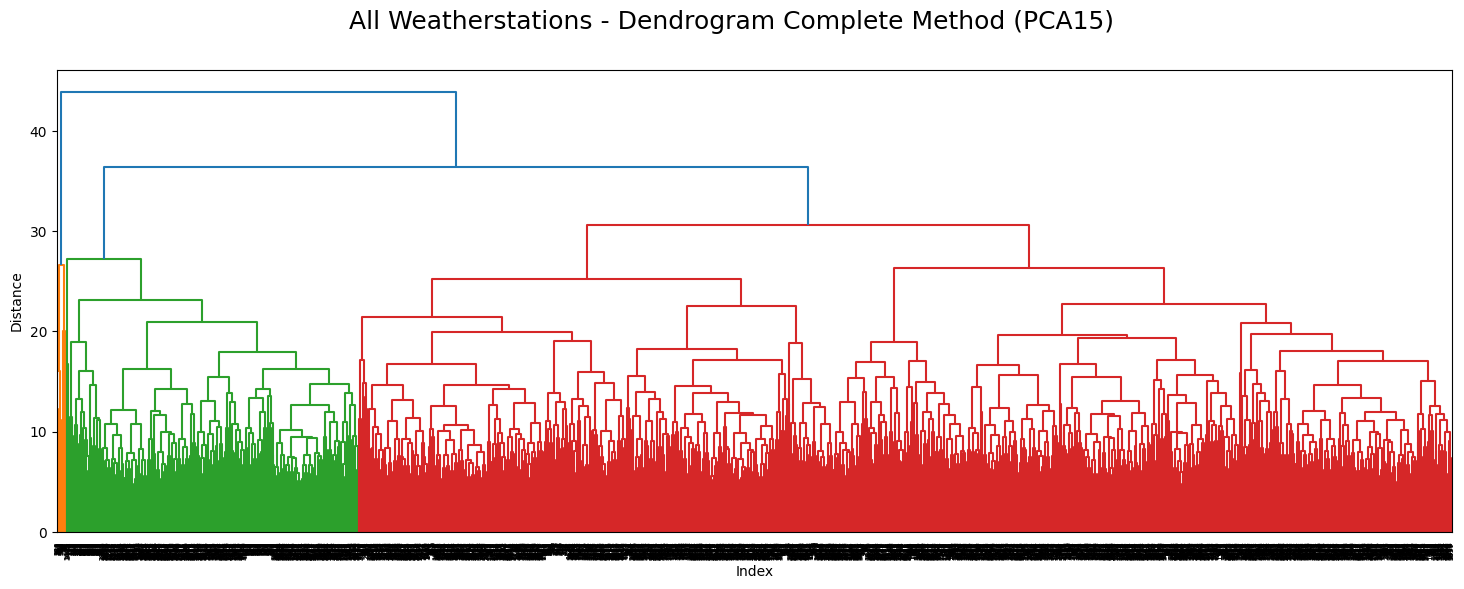

In [24]:
distance_complete_pca15 = linkage(dfPCA15, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete_pca15, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Complete Method (PCA15)",fontsize=18)
plt.show()

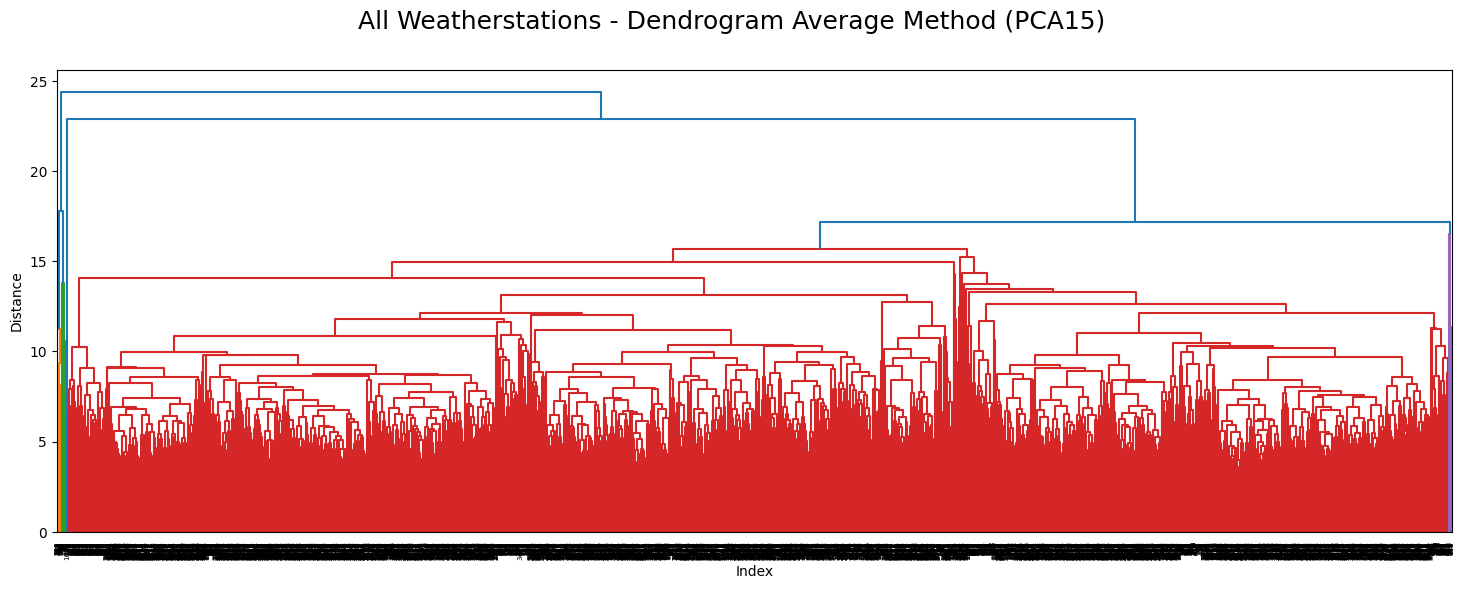

In [25]:
distance_average_pca15 = linkage(dfPCA15, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average_pca15, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Average Method (PCA15)",fontsize=18)
plt.show()

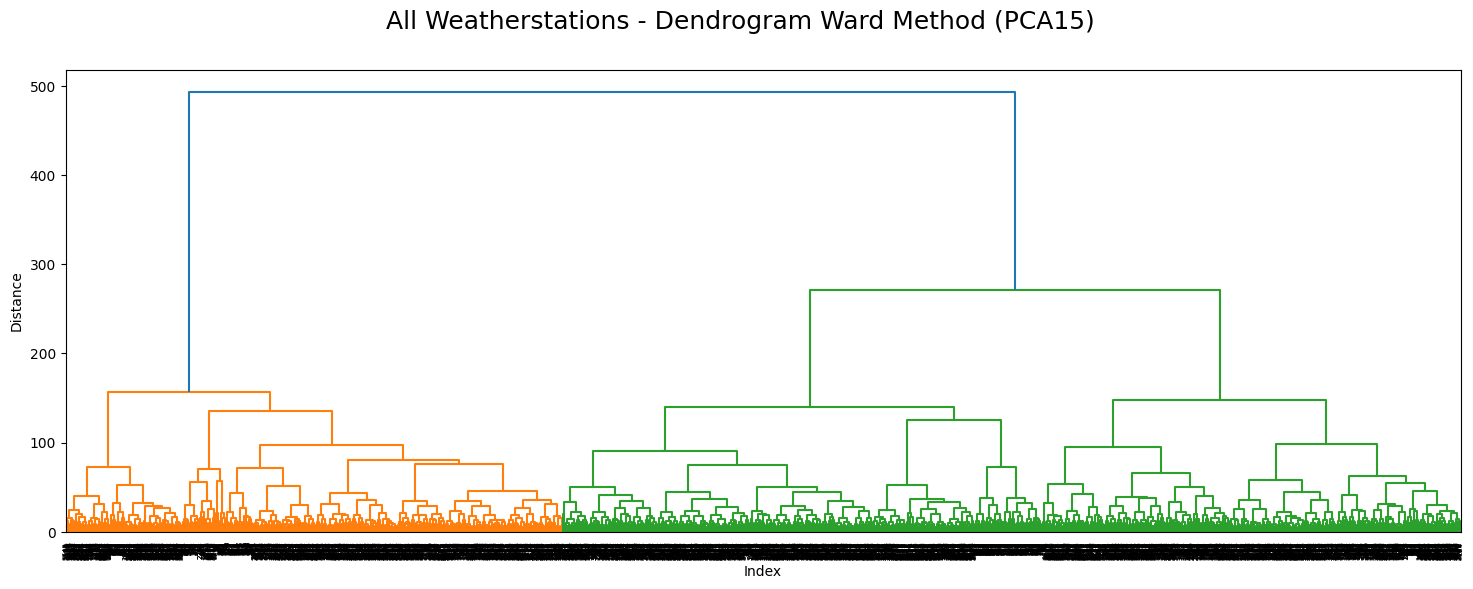

In [26]:
distance_ward_pca15 = linkage(dfPCA15, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward_pca15, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Ward Method (PCA15)",fontsize=18)
plt.show()

In [27]:
# Export scaled combined Data
df_scaled.to_csv(os.path.join(path, '02 Data', 'Unsupervised', 'Scaled_Decade_Data.csv'), index = False)